Plotting SAMEPLOTS resolution as function of neutrino properties for...
Calulating with statistic SIXTYEIGHT...
Plotting nu_energy...
Plotting  SAMEGRAPHG angular resolution depending on properties!



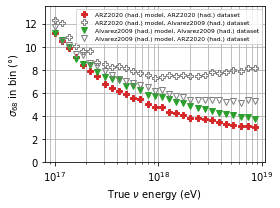

In [1]:

# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import argparse
import os
import time
import pickle
from NuRadioReco.utilities import units
from scipy import stats
from itertools import product, combinations
from radiotools import plthelpers as php
from tensorflow import keras
from radiotools import helper as hp
from termcolor import colored
# -------

# Directories
plots_dir = "plots"

# Set the figsize in order to get larger text in image
plt.rcParams["figure.figsize"] = (4.0,3.0)

def plot_same(x_data_1, x_data_2, x_data_3, x_data_4, ax1_data_y_1, ax1_data_y_2, ax1_data_y_3, ax1_data_y_4):
    print(f"Plotting {file_name}...")

    fig_same, ax1 = plt.subplots()

    ax1.set_xlabel(x_label)
    ax1.set_ylabel(ax1_y_label)

    # Set ax1 to high order to make it be in front so label is in front, and datapoints
    #ax1.set_zorder(1)

    if file_name == "nu_energy":
        ax1.set_xscale('log')

    # Remove last peices of data as their bins are weird for some azimuth
    if file_name == "nu_energy" or file_name == "nu_azimuth" or file_name == "nu_SNR":
        x_data_1 = x_data_1[0:-1]
        x_data_2 = x_data_2[0:-1]
        x_data_3 = x_data_3[0:-1]
        x_data_4 = x_data_4[0:-1]
        ax1_data_y_1 = ax1_data_y_1[0:-1]
        ax1_data_y_2 = ax1_data_y_2[0:-1]
        ax1_data_y_3 = ax1_data_y_3[0:-1]
        ax1_data_y_4 = ax1_data_y_4[0:-1]

    # Remove any bins with zero events for nu_zenith
    if file_name == "nu_zenith":
        zero_mask = ax1_data_y_4 == 0
        x_data_4 = x_data_4[~zero_mask]
        ax1_data_y_4 = ax1_data_y_4[~zero_mask]

        zero_mask = ax1_data_y_3 == 0
        x_data_3 = x_data_3[~zero_mask]
        ax1_data_y_3 = ax1_data_y_3[~zero_mask]

        ind_count_not_0 = ax2_data_y_1 != 0
        x_data_1 = x_data_1[ind_count_not_0]
        ax1_data_y_1 = ax1_data_y_1[ind_count_not_0]

        ind_count_not_0 = ax2_data_y_2 != 0
        x_data_2 = x_data_2[ind_count_not_0]
        ax1_data_y_2 = ax1_data_y_2[ind_count_not_0]

    # # Remove last peices of data as their bins are weird for some azimuth
    # if file_name == "shower_energy" or file_name == "nu_azimuth" or file_name == "nu_SNR":
    #     x_data_1 = x_data_1[0:-1]
    #     x_data_2 = x_data_2[0:-1]
    #     x_data_3 = x_data_3[0:-1]
    #     ax1_data_y_1 = ax1_data_y_1[0:-1]
    #     ax1_data_y_2 = ax1_data_y_2[0:-1]
    #     ax1_data_y_3 = ax1_data_y_3[0:-1]

    # Remove any bins with zero events for nu_zenith
    # if file_name == "nu_zenith":
    #     ind_count_not_0 = ax2_data_y_1 != 0
    #     x_data_1 = x_data_1[ind_count_not_0]
    #     ax1_data_y_1 = ax1_data_y_1[ind_count_not_0]

    #     ind_count_not_0 = ax2_data_y_2 != 0
    #     x_data_2 = x_data_2[ind_count_not_0]
    #     ax1_data_y_2 = ax1_data_y_2[ind_count_not_0]

    #     ind_count_not_0 = ax2_data_y_3 != 0
    #     x_data_3 = x_data_3[ind_count_not_0]
    #     ax1_data_y_3 = ax1_data_y_3[ind_count_not_0]

    # lns1 = ax1.plot(x_data_1, ax1_data_y_1, "*", color=ax1_color, label = emission_models[0])
    # lns2 = ax1.plot(x_data_2, ax1_data_y_2, "*", color=ax1_color, label = emission_models[1])
    # lns3 = ax1.plot(x_data_3, "*", color=ax1_color, label = emission_models[2])

    lns1 = ax1.plot(x_data_1, ax1_data_y_1, point_format[0], label = emission_models[0], color=colours[0], fillstyle=fillstyle[0])
    lns2 = ax1.plot(x_data_2, ax1_data_y_2, point_format[1], label = emission_models[1], color=colours[1], fillstyle=fillstyle[1])
    lns3 = ax1.plot(x_data_3, ax1_data_y_3, point_format[2], label = emission_models[2], color=colours[2], fillstyle=fillstyle[2])
    lns4 = ax1.plot(x_data_4, ax1_data_y_4, point_format[3], label = emission_models[3], color=colours[3], fillstyle=fillstyle[3])


    # Set axis limits so they are same on all plots
    # Set axis limits so they are same on all plots
    if file_name == "nu_energy":
        ax1.set_ylim(0, 13.5)
    elif file_name == "nu_SNR":
        ax1.set_ylim(0, 22.5)
    elif file_name == "nu_zenith":
        ax1.set_ylim(0, 10)
    elif file_name == "nu_azimuth":
        ax1.set_ylim(0, 8)

    # plt.title(plot_title)
    plt.grid(True, which="both")

    ax1.legend(prop={'size': 6})

    fig_same.tight_layout()  # otherwise the right y-label is slightly clipped

    #plt.subplots_adjust(top=0.88)
    fig_same.savefig(f"{plot_dir}/all_on_same/{plot_name_prepend}_{file_name}_same_statistic_{statistic_string}.pdf", bbox_inches='tight')



# Save the run name
# run_names = ["run_HAD_vs_EMHAD", "run_EMHAD_vs_HAD"]
# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had. + EM) dataset", "ARZ2020 (had. + EM) model, ARZ2020 (had.) dataset"]
# colours = ["tab:green", "tab:red"]
# point_format = ["v", "P"]

### THIS IS USED, OR THE OTHER ONE WITH "THIS IS USED" TAG
# plot_name_prepend = "ARZHAD_vs_ARZHADEM"
# run_names = ["run_ARZHAD_vs_ARZHAD",
#             "run_ARZHAD_vs_ARZHADEM", 
#             "run_ARZHADEM_vs_ARZHADEM", 
#             "run_ARZHADEM_vs_ARZHAD"]

# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
#                     "ARZ2020 (had.) model, ARZ2020 (had. + EM) dataset",
#                     "ARZ2020 (had. + EM) model, ARZ2020 (had. + EM) dataset", 
#                     "ARZ2020 (had. + EM) model, ARZ2020 (had.) dataset",
#                     ]
# colours = ["tab:red", "tab:gray", "tab:purple", "tab:gray"]
# point_format = ["P", "P", "p", "p"]
# fillstyle = ["full", "none", "full", "none"]

# plot_name_prepend = "ARZHAD_vs_ARZHADEM_model:ARZHAD"
# run_names = ["run_ARZHAD_vs_ARZHAD",
#             "run_ARZHAD_vs_ARZHADEM", ]

# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
#                     "ARZ2020 (had.) model, ARZ2020 (had. + EM) dataset",
#                     ]
# colours = ["tab:red", "tab:gray"]
# point_format = ["P", "P"]
# fillstyle = ["full", "none"]

# plot_name_prepend = "ARZHAD_vs_ARZHADEM_model:ARZHADEM"
# run_names = ["run_ARZHADEM_vs_ARZHADEM", 
#              "run_ARZHADEM_vs_ARZHAD" ]

# emission_models = ["ARZ2020 (had. + EM) model, ARZ2020 (had. + EM) dataset", 
#                     "ARZ2020 (had. + EM) model, ARZ2020 (had.) dataset",
#                     ]
# colours = ["tab:purple", "tab:gray"]
# point_format = ["p", "p"]
# fillstyle = ["full", "none"]

### THIS IS USED, OR THE OTHER ONE WITH "THIS IS USED" TAG
plot_name_prepend = "ARZHAD_vs_ALVAREZHAD"
run_names = ["run_ARZHAD_vs_ARZHAD",
            "run_ARZHAD_vs_ALVAREZHAD",
            "run_ALVAREZHAD_vs_ALVAREZHAD",
            "run_ALVAREZHAD_vs_ARZHAD" ]

emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
                    "ARZ2020 (had.) model, Alvarez2009 (had.) dataset",
                    "Alvarez2009 (had.) model, Alvarez2009 (had.) dataset", 
                    "Alvarez2009 (had.) model, ARZ2020 (had.) dataset",
                    ]
colours = ["tab:red", "tab:gray", "tab:green", "tab:gray"]
point_format = ["P", "P", "v", "v"]
fillstyle = ["full", "none", "full", "none"]

# plot_name_prepend = "ARZHAD_vs_ALVAREZHAD_model:ARZHAD"
# run_names = ["run_ARZHAD_vs_ARZHAD",
#             "run_ARZHAD_vs_ALVAREZHAD", ]

# emission_models = ["ARZ2020 (had.) model, ARZ2020 (had.) dataset", 
#                     "ARZ2020 (had.) model, Alvarez2009 (had.) dataset",
#                     ]
# colours = ["tab:red", "tab:gray"]
# point_format = ["P", "P"]
# fillstyle = ["full", "none"]

# plot_name_prepend = "ARZHAD_vs_ALVAREZHAD_model:ALVAREZHAD"
# run_names = ["run_ALVAREZHAD_vs_ALVAREZHAD",
#             "run_ALVAREZHAD_vs_ARZHAD", ]

# emission_models = ["Alvarez2009 (had.) model, Alvarez2009 (had.) dataset", 
#                     "Alvarez2009 (had.) model, ARZ2020 (had.) dataset",
#                     ]
# colours = ["tab:green", "tab:gray"]
# point_format = ["v", "v"]
# fillstyle = ["full", "none"]


print(colored(f"Plotting SAMEPLOTS resolution as function of neutrino properties for...", "yellow"))


# See which statistic to calculate...
statistic_string = "SIXTYEIGHT"
print(f"Calulating with statistic {statistic_string}...")


# Make sure plots folder exists
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

plot_dir = f"{plots_dir}"

# Make sure folder inside plot_folder exists for the plots
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

# Make sure same_data file exists
same_data_file = f'{plots_dir}/plotdata_SIXTYEIGHT_{run_names[0]}.npy'
if not os.path.isfile(same_data_file):
    print("Same datafile does not exist!")
    raise Exception

# Load same data file
with open(same_data_file, 'rb') as f:
    nu_energy_bins_1 = np.load(f)
    binned_resolution_nu_energy_1 = np.load(f)
    binned_resolution_nu_energy_count_1 = np.load(f)

    nu_azimuth_bins_1 = np.load(f)
    binned_resolution_nu_azimuth_1 = np.load(f)
    binned_resolution_nu_azimuth_count_1 = np.load(f)

    nu_zenith_bins_1 = np.load(f)
    binned_resolution_nu_zenith_1 = np.load(f)
    binned_resolution_nu_zenith_count_1 = np.load(f)

    SNR_means_1 = np.load(f)
    binned_resolution_SNR_mean_1 = np.load(f)
    binned_resolution_SNR_mean_count_1 = np.load(f)

# Make sure same_data file exists
same_data_file = f'{plots_dir}/plotdata_SIXTYEIGHT_{run_names[1]}.npy'
if not os.path.isfile(same_data_file):
    print("Same datafile does not exist!")
    raise Exception

# Load same data file
with open(same_data_file, 'rb') as f:
    nu_energy_bins_2 = np.load(f)
    binned_resolution_nu_energy_2 = np.load(f)
    binned_resolution_nu_energy_count_2 = np.load(f)

    nu_azimuth_bins_2 = np.load(f)
    binned_resolution_nu_azimuth_2 = np.load(f)
    binned_resolution_nu_azimuth_count_2 = np.load(f)

    nu_zenith_bins_2 = np.load(f)
    binned_resolution_nu_zenith_2 = np.load(f)
    binned_resolution_nu_zenith_count_2 = np.load(f)

    SNR_means_2 = np.load(f)
    binned_resolution_SNR_mean_2 = np.load(f)
    binned_resolution_SNR_mean_count_2 = np.load(f)

# Make sure same_data file exists
same_data_file = f'{plots_dir}/plotdata_SIXTYEIGHT_{run_names[2]}.npy'
if not os.path.isfile(same_data_file):
    print("Same datafile does not exist!")
    raise Exception

# Load same data file
with open(same_data_file, 'rb') as f:
    nu_energy_bins_3 = np.load(f)
    binned_resolution_nu_energy_3 = np.load(f)
    binned_resolution_nu_energy_count_3 = np.load(f)

    nu_azimuth_bins_3 = np.load(f)
    binned_resolution_nu_azimuth_3 = np.load(f)
    binned_resolution_nu_azimuth_count_3 = np.load(f)

    nu_zenith_bins_3 = np.load(f)
    binned_resolution_nu_zenith_3 = np.load(f)
    binned_resolution_nu_zenith_count_3 = np.load(f)

    SNR_means_3 = np.load(f)
    binned_resolution_SNR_mean_3 = np.load(f)
    binned_resolution_SNR_mean_count_3 = np.load(f)

# Make sure same_data file exists
same_data_file = f'{plots_dir}/plotdata_SIXTYEIGHT_{run_names[3]}.npy'
if not os.path.isfile(same_data_file):
    print("Same datafile does not exist!")
    raise Exception

# Load same data file
with open(same_data_file, 'rb') as f:
    nu_energy_bins_4 = np.load(f)
    binned_resolution_nu_energy_4 = np.load(f)
    binned_resolution_nu_energy_count_4 = np.load(f)

    nu_azimuth_bins_4 = np.load(f)
    binned_resolution_nu_azimuth_4 = np.load(f)
    binned_resolution_nu_azimuth_count_4 = np.load(f)

    nu_zenith_bins_4 = np.load(f)
    binned_resolution_nu_zenith_4 = np.load(f)
    binned_resolution_nu_zenith_count_4 = np.load(f)

    SNR_means_4 = np.load(f)
    binned_resolution_SNR_mean_4 = np.load(f)
    binned_resolution_SNR_mean_count_4 = np.load(f)

sigma_68_string = "_{68}"

ax2_data_y_1 = binned_resolution_nu_zenith_count_1
ax2_data_y_2 = binned_resolution_nu_zenith_count_2
ax2_data_y_3 = binned_resolution_nu_zenith_count_3
ax2_data_y_4 = binned_resolution_nu_zenith_count_4

# Energy resolution & count on same axis
# Constants:
ax1_color = 'tab:blue'
ax2_color = 'tab:orange'
x_label = r"True $\nu$ energy (eV)"
ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin (°)"
ax2_y_label = "Events"

x_data_1 = nu_energy_bins_1
x_data_2 = nu_energy_bins_2
x_data_3 = nu_energy_bins_3
x_data_4 = nu_energy_bins_4
ax1_data_y_1 = binned_resolution_nu_energy_1
ax1_data_y_2 = binned_resolution_nu_energy_2
ax1_data_y_3 = binned_resolution_nu_energy_3
ax1_data_y_4 = binned_resolution_nu_energy_4


file_name = "nu_energy"
# plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of $\nu$ energy"
plot_title = ""
legend_loc = "upper center"
# Constants END

plot_same(x_data_1, x_data_2, x_data_3, x_data_4, ax1_data_y_1, ax1_data_y_2, ax1_data_y_3, ax1_data_y_4)
# ______________________________________


# # Azimuth resolution & count on same axis
# # Constants:
# x_label = r"True $\nu$ azimuth angle (°)"
# ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin (°)"
# ax2_y_label = "Events"

# x_data_1 = nu_azimuth_bins_1
# x_data_2 = nu_azimuth_bins_2
# ax1_data_y_1 = binned_resolution_nu_azimuth_1
# ax1_data_y_2 = binned_resolution_nu_azimuth_2


# file_name = "nu_azimuth"
# # plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of $\nu$ azimuth angle"
# plot_title = ""
# legend_loc = "upper right"
# # Constants END

# # plot_same(x_data_1, x_data_2, ax1_data_y_1, ax1_data_y_2, ax2_data_y_1, ax2_data_y_2)
# # ______________________________________



# # Zenith resolution & count on same axis
# # Constants:
# x_label = r"True $\nu$ zenith angle (°)"
# ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin (°)"
# ax2_y_label = "Events"

# x_data_1 = nu_zenith_bins_1
# x_data_2 = nu_zenith_bins_2
# ax1_data_y_1 = binned_resolution_nu_zenith_1
# ax1_data_y_2 = binned_resolution_nu_zenith_2


# file_name = "nu_zenith"
# # plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of $\nu$ zenith angle"
# plot_title = ""
# legend_loc = "upper left"
# # Constants END

# # plot_same(x_data_1, x_data_2, ax1_data_y_1, ax1_data_y_2, ax2_data_y_1, ax2_data_y_2)
# ______________________________________


# # SNR resolution & count on same axis
# # Constants:
# x_label = r"Event SNR"
# ax1_y_label = fr"$\sigma{sigma_68_string}$ in bin (°)"
# ax2_y_label = "Events"

# x_data_1 = SNR_means_1
# x_data_2 = SNR_means_2
# ax1_data_y_1 = binned_resolution_SNR_mean_1
# ax1_data_y_2 = binned_resolution_SNR_mean_2


# file_name = "nu_SNR"
# # plot_title = fr"Value of $\sigma{sigma_68_string}$ as a function of event SNR"
# plot_title = ""
# legend_loc = "upper right"
# # Constants END

# # plot_same(x_data_1, x_data_2, ax1_data_y_1, ax1_data_y_2, ax2_data_y_1, ax2_data_y_2)
# ______________________________________

print(colored(f"Plotting  SAMEGRAPHG angular resolution depending on properties!", "green", attrs=["bold"]))
print("")
